In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/AviationData_clean.csv', index_col=0)

engine_data = df.copy()

print(engine_data.head(5))

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
5  20170710X52551           Accident      NYC79AA106  1979-09-17   

          Location        Country Aircraft.damage Registration.Number  \
0  MOOSE CREEK, ID  United States       Destroyed              NC6404   
1   BRIDGEPORT, CA  United States       Destroyed              N5069P   
2    Saltville, VA  United States       Destroyed              N5142R   
3       EUREKA, CA  United States       Destroyed              N1168J   
5       BOSTON, MA  United States     Substantial              CF-TLU   

                Make     Model  ...    Engine.Type  Purpose.of.flight  \
0            Stinson     108-3  ...  Reciprocating           Personal   
1     

Text(0, 0.5, 'Number of Accidents')

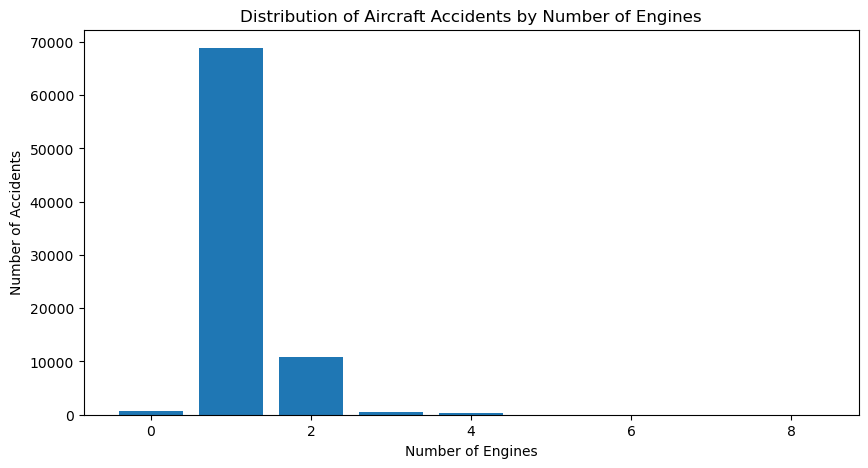

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))


x = engine_data['Number.of.Engines'].value_counts().index
y = engine_data['Number.of.Engines'].value_counts().values

ax.bar(x, y)
ax.set_title('Distribution of Aircraft Accidents by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Number of Accidents')


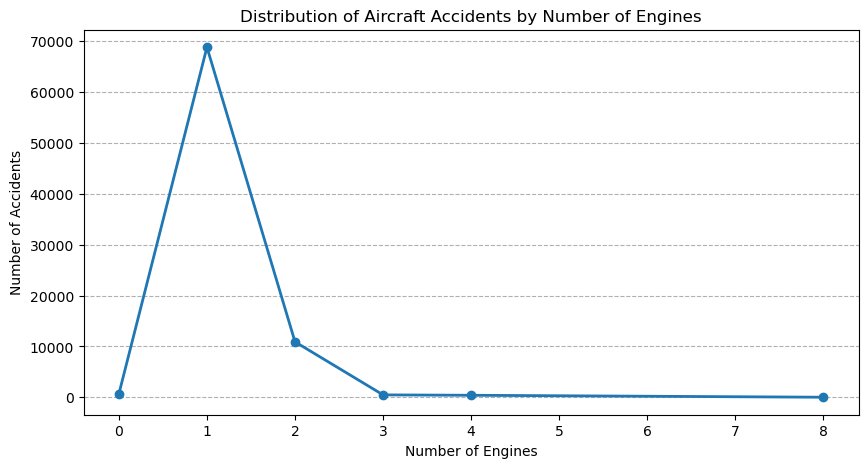

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

x = engine_data['Number.of.Engines'].value_counts().sort_index().index
y = engine_data['Number.of.Engines'].value_counts().sort_index().values

ax.plot(x, y, marker='o', linestyle='-', linewidth=2)  
ax.set_title('Distribution of Aircraft Accidents by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Number of Accidents')

plt.grid(axis='y', linestyle='--')  
plt.show()

#When comparing the number of engines to the total number of accidents, aircraft with at least two engines had the lowest number of accidents.

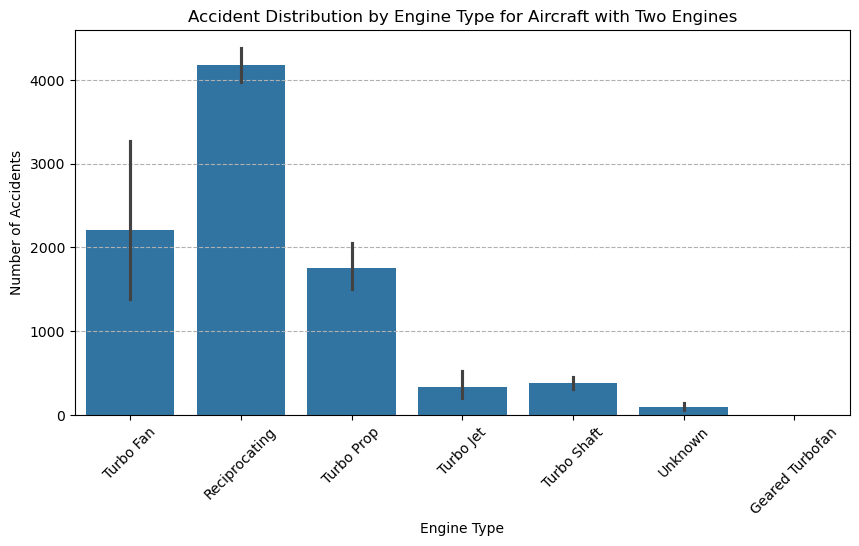

In [ ]:

two_engine_data = engine_data[engine_data['Number.of.Engines'] == 2]


x = two_engine_data['Engine.Type']  
y = two_engine_data['Total.Fatal.Injuries']


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=two_engine_data, x='Engine.Type', y='Total.Fatal.Injuries', estimator='sum', ax=ax)
ax.set_title('Accident Distribution by Engine Type for Aircraft with Two Engines')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()
#Transition to twin-engine models for improved safety and performance.



In [88]:
two_engine_data.groupby(['Make'])[['Total.Fatal.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

,Total.Fatal.Injuries
Make,
Cessna,1619.0
Beech,1504.0
Piper,1462.0
Boeing,732.0
Douglas,342.0
Mcdonnell Douglas,310.0
Airbus Industrie,267.0
Airbus,267.0
Embraer,170.0


In [99]:
limited_2e_data = two_engine_data[~(two_engine_data['Engine.Type'].isin(['Reciprocating', 'Turbo Fan', 'Turbo Prop', 'Unknown']))]
limited_2e_data['Engine.Type'].value_counts()

Engine.Type
Turbo Shaft        518
Turbo Jet          444
Geared Turbofan     12
Name: count, dtype: int64

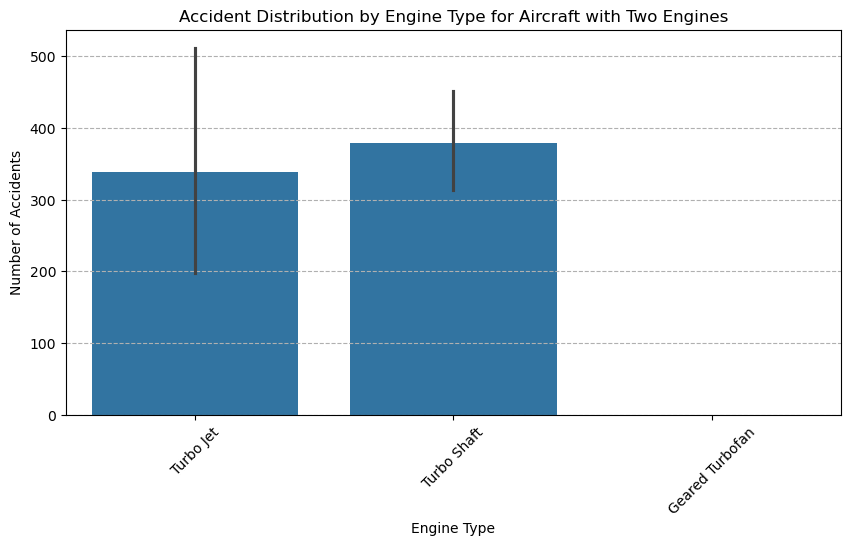

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=limited_2e_data, x='Engine.Type', y='Total.Fatal.Injuries', estimator='sum', ax=ax)
ax.set_title('Accident Distribution by Engine Type for Aircraft with Two Engines')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()
# Focusing on Turbo Jet and Turbo Shaft engines enhances safety and performance

In [113]:
limited_2e_data.groupby(['Make'])['Total.Uninjured'].mean().sort_values(ascending=False)
# Airbus and Boeing aircraft demonstrate lower accident rates.

Make
Airbus Industrie                 148.090909
Boeing                           101.449438
Mcdonnell Douglas                 82.951613
Mcdonnell Douglas Aircraft Co     61.000000
British Aircraft Corp. (Bac)      57.333333
Douglas                           54.285714
Fokker                            52.750000
Embraer                           52.272727
Bac                               48.000000
Northrop                          45.250000
Name: Total.Uninjured, dtype: float64

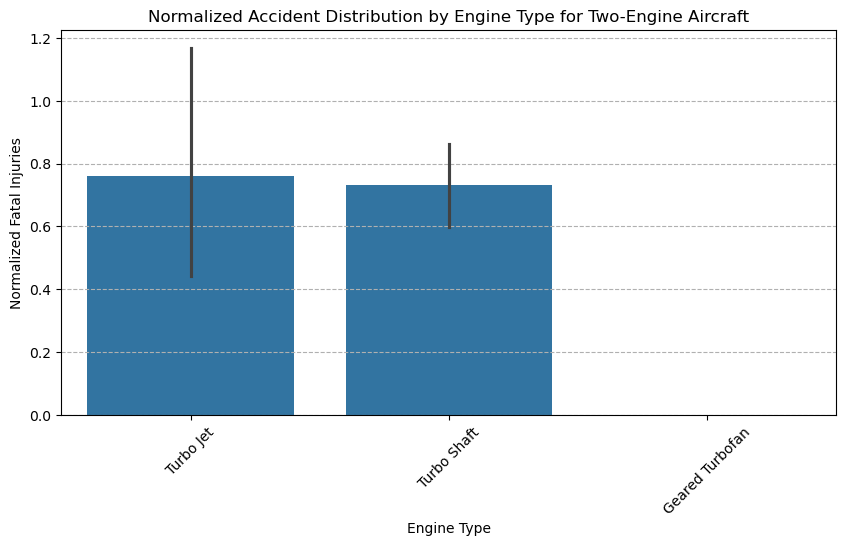

Average number of uninjured passengers by manufacturer:
Make
Airbus Industrie                 148.090909
Boeing                           101.449438
Mcdonnell Douglas                 82.951613
Mcdonnell Douglas Aircraft Co     61.000000
British Aircraft Corp. (Bac)      57.333333
                                    ...    
Gulfstream Aerospace               0.000000
Hamburger Flugzeugbau (Hfb)        0.000000
Mbb-Bolkow                         0.000000
Hiller                             0.000000
Bombardier Inc                     0.000000
Name: Total.Uninjured, Length: 100, dtype: float64


In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=limited_2e_data, 
    x='Engine.Type', 
    y='Total.Fatal.Injuries',  
    estimator='mean',
    ax=ax
)
ax.set_title('Normalized Accident Distribution by Engine Type for Two-Engine Aircraft')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Normalized Fatal Injuries')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()


mean_uninjured = limited_2e_data.groupby('Make')['Total.Uninjured'].mean().sort_values(ascending=False)
print("Average number of uninjured passengers by manufacturer:")
print(mean_uninjured)


focused_data = limited_2e_data[
    limited_2e_data['Engine.Type'].isin(['Turbo Jet', 'Turbo Shaft'])
]



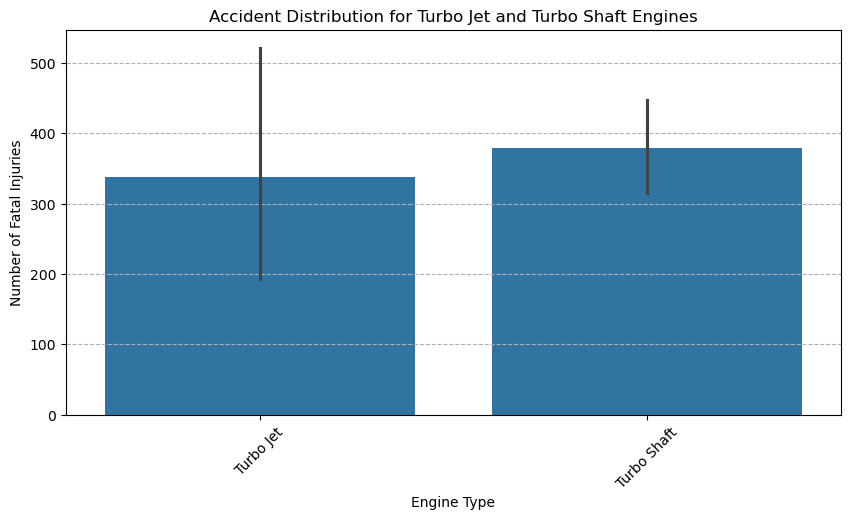

Transitioning to twin-engine models with a focus on safer engine types can enhance performance and safety.


In [126]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=focused_data,
    x='Engine.Type',
    y='Total.Fatal.Injuries',
    estimator='sum',
    ax=ax
)
ax.set_title('Accident Distribution for Turbo Jet and Turbo Shaft Engines')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Number of Fatal Injuries')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()


print("Transitioning to twin-engine models with a focus on safer engine types can enhance performance and safety.")

In [128]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 2002]
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Registration.Number,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Location_City,Location_State
51959,20020107X00039,Accident,MIA02FA048,2002-01-01,"HOLLYWOOD, FL",United States,Substantial,N3525Y,Piper,PA-31-350,...,Reciprocating,Unknown,1.0,4.0,0.0,0.0,VMC,Descent,Hollywood,FL
51960,20020103X00009,Incident,MIA02IA047,2002-01-01,"Miami, FL",United States,Minor,9Y-THQ,Mcdonnell Douglas,MD-83,...,Turbo Fan,Unknown,0.0,0.0,0.0,125.0,VMC,Landing,Miami,FL
51961,20020104X00037,Accident,SEA02FA023,2002-01-02,"BOISE, ID",United States,Substantial,N132Z,Beech,58P,...,Reciprocating,Flight Test,0.0,0.0,0.0,2.0,VMC,Takeoff,Boise,ID
51962,20020110X00051,Accident,ATL02LA029,2002-01-02,"GREENVILLE, SC",United States,Substantial,N262FE,Boeing,727-200,...,Turbo Fan,Unknown,0.0,0.0,0.0,3.0,IMC,Taxi,Greenville,SC
51963,20020116X00081,Accident,SEA02TA022,2002-01-03,"BUTTE, MT",United States,Substantial,N8393F,Hughes,369D,...,Turbo Shaft,Public Aircraft,0.0,0.0,0.0,2.0,IMC,Cruise,Butte,MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Substantial,N18158,Cessna,150,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Iola,TX
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Substantial,N2047Q,Cessna,177RG,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Dacula,GA
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Substantial,N2889W,Beech,B-60,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Ardmore,OK
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Substantial,N778MS,Stephen J Hoffman,MS-500,...,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,Cruise,Houston,TX
